<a href="https://colab.research.google.com/github/Kalyanasundaram12/Machine-Learning-Techniques/blob/main/Copy_of_Bigata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn import decomposition
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/housing.csv")

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.dropna(subset=[cols for cols in df.columns], inplace=True)

In [ ]:
df.shape

(20433, 10)

In [ ]:
corr_df = df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1)

In [ ]:
corr_df.head

<bound method NDFrame.head of        housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0  

In [ ]:
corr_df.corrwith(df['median_house_value'])

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64

In [ ]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']
type(Y)

pandas.core.series.Series

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

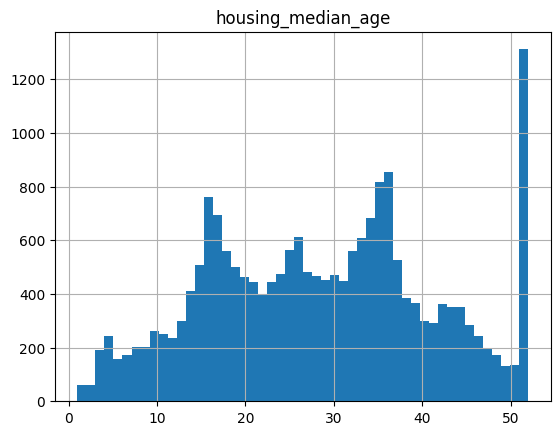

In [ ]:
df.hist(column='housing_median_age', bins=50)

array([[<Axes: title={'center': 'total_rooms'}>]], dtype=object)

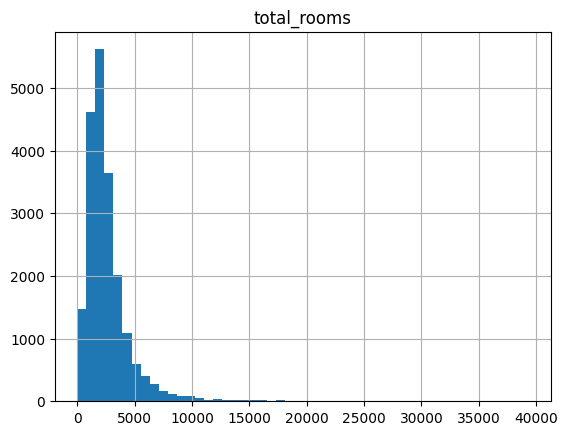

In [ ]:
df.hist(column='total_rooms', bins=50)

array([[<Axes: title={'center': 'total_bedrooms'}>]], dtype=object)

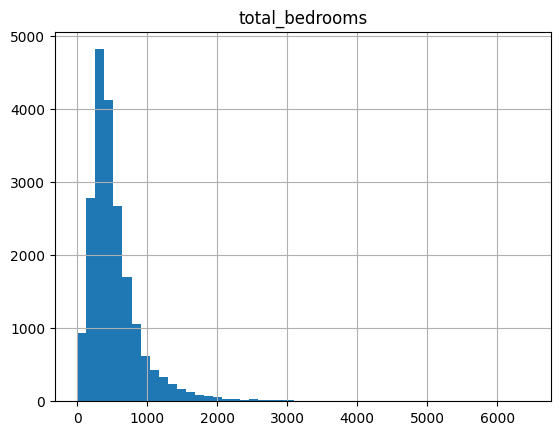

In [ ]:
df.hist(column='total_bedrooms', bins=50)

array([[<Axes: title={'center': 'population'}>]], dtype=object)

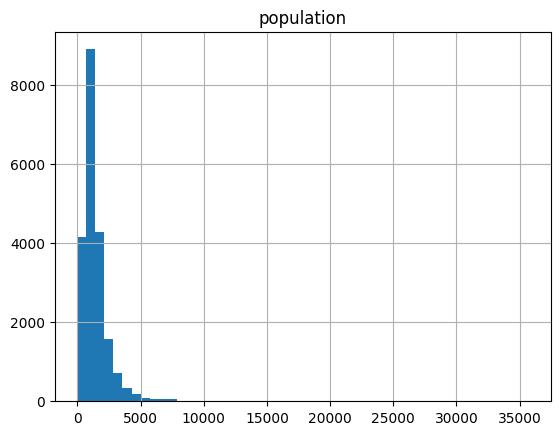

In [ ]:
df.hist(column='population', bins=50)

array([[<Axes: title={'center': 'households'}>]], dtype=object)

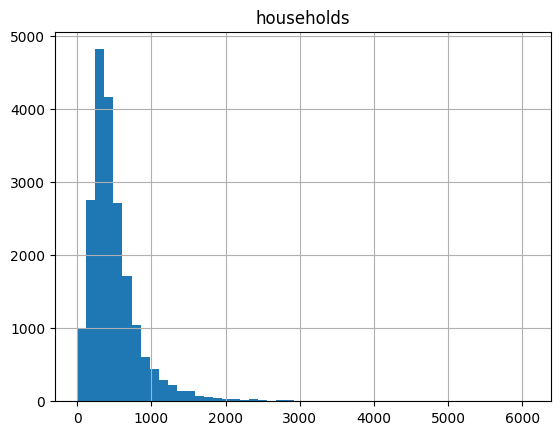

In [ ]:
df.hist(column='households', bins=50)

array([[<Axes: title={'center': 'median_income'}>]], dtype=object)

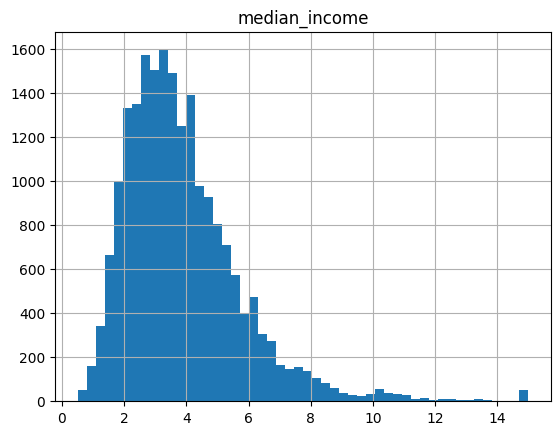

In [ ]:
df.hist(column='median_income', bins=50)

array([[<Axes: title={'center': 'median_house_value'}>]], dtype=object)

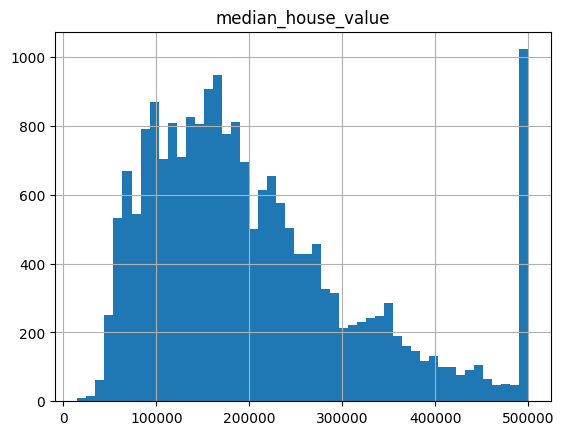

In [ ]:
df.hist(column='median_house_value', bins=50)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df = pd.get_dummies(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [ ]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [ ]:
X_train = scaler1.fit_transform(X_train)
Y_train = scaler2.fit_transform(Y_train)

In [ ]:
X_test = scaler1.transform(X_test)
Y_test = scaler2.transform(Y_test)

In [ ]:
X_test

array([[ 0.69672382, -0.44472766, -1.23943702, ..., -0.00836184,
        -0.3539009 , -0.38075292],
       [-1.39289986,  1.29648108, -1.00208813, ..., -0.00836184,
        -0.3539009 , -0.38075292],
       [ 0.84633888, -0.88471052,  1.84609854, ..., -0.00836184,
        -0.3539009 , -0.38075292],
       ...,
       [ 1.31014557, -0.88471052, -0.76473924, ..., -0.00836184,
        -0.3539009 , -0.38075292],
       [-1.09865691,  0.98755695, -0.29004146, ..., -0.00836184,
        -0.3539009 , -0.38075292],
       [ 0.64685213, -0.77705514,  0.42200521, ..., -0.00836184,
        -0.3539009 , -0.38075292]])

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_preds = reg.predict(X_test)

In [ ]:
y_preds = scaler2.inverse_transform(y_preds)
y_preds

array([[245496.97630537],
       [130259.53322668],
       [199852.70639476],
       ...,
       [166212.30118452],
       [380512.69074881],
       [115414.86037712]])

In [ ]:
pca = decomposition.PCA(n_components=2)
components = pca.fit_transform(X_train)

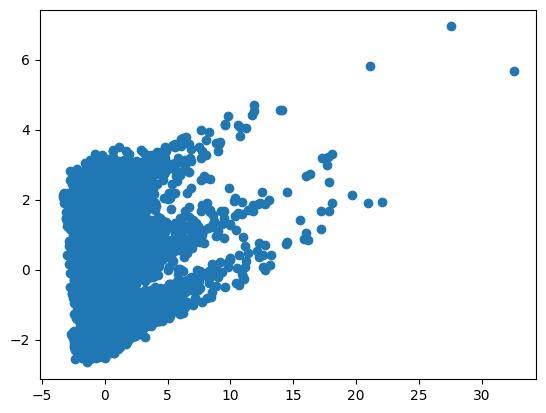

In [ ]:
plt.scatter(components[:,0], components[:,1])

In [ ]:
pca.explained_variance_ratio_

array([0.30256529, 0.19685899])

In [ ]:
pca.singular_values_

array([237.18913779, 191.32110172])

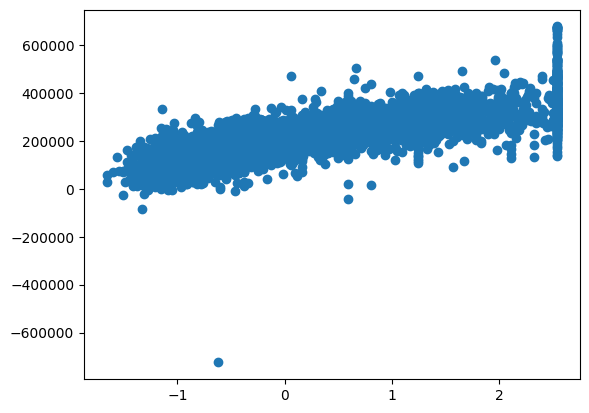

In [ ]:
plt.scatter(Y_test, y_preds)

In [ ]:
mean_absolute_percentage_error(Y_test, y_preds)

1420738.8795324832

In [ ]:
mean_squared_error(Y_test, y_preds)

50914135766.77504

In [ ]:
r2_score(Y_test, y_preds)

-51058664544.94826

In [ ]:
df.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [ ]:
df.shape

(20433, 14)

#K Means Clustering

In [ ]:
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [ ]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [ ]:
x=df.iloc[:,[2,7]].values
print(x)

[[41.      8.3252]
 [21.      8.3014]
 [52.      7.2574]
 ...
 [17.      1.7   ]
 [18.      1.8672]
 [16.      2.3886]]


In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=50)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<function matplotlib.pyplot.show(close=None, block=None)>

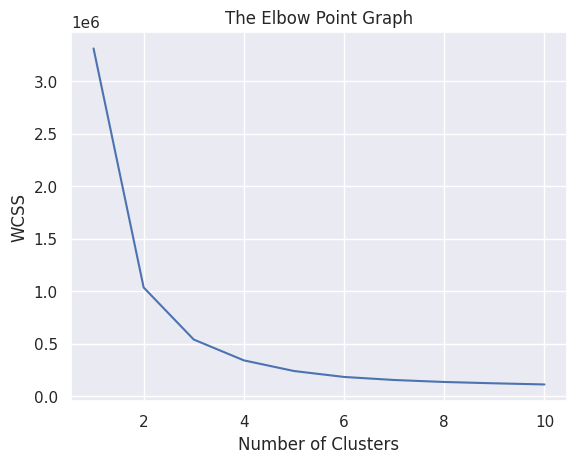

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++' ,random_state=0)

#return label for each datapoint based on clusters
y = kmeans.fit_predict(x)
print(y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 2 ... 0 0 0]


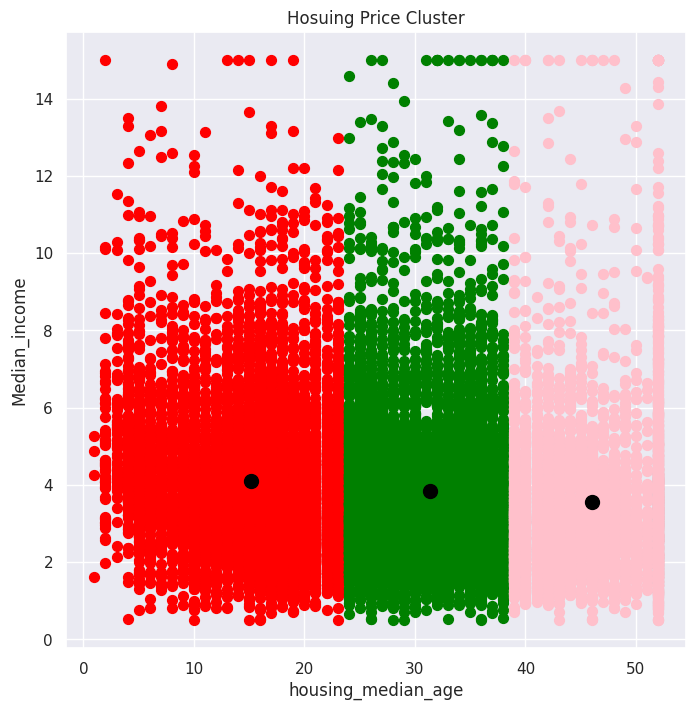

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50, c='red',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50, c='green',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50, c='pink',label='Cluster 3')

#ploting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title('Hosuing Price Cluster')
plt.xlabel('housing_median_age')
plt.ylabel('Median_income')
plt.show()

K Means Clustering with Latitude vs Longitude

In [ ]:
x=df.iloc[:,[0,1]].values
print(x)

[[-122.23   37.88]
 [-122.22   37.86]
 [-122.24   37.85]
 ...
 [-121.22   39.43]
 [-121.32   39.43]
 [-121.24   39.37]]


In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=50)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<function matplotlib.pyplot.show(close=None, block=None)>

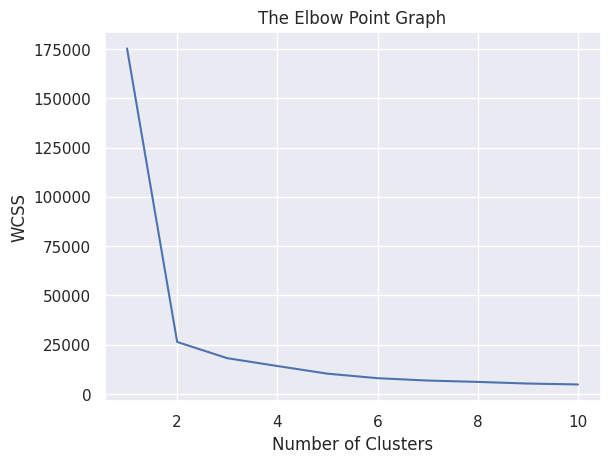

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++' ,random_state=0)

#return label for each datapoint based on clusters
y = kmeans.fit_predict(x)
print(y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]


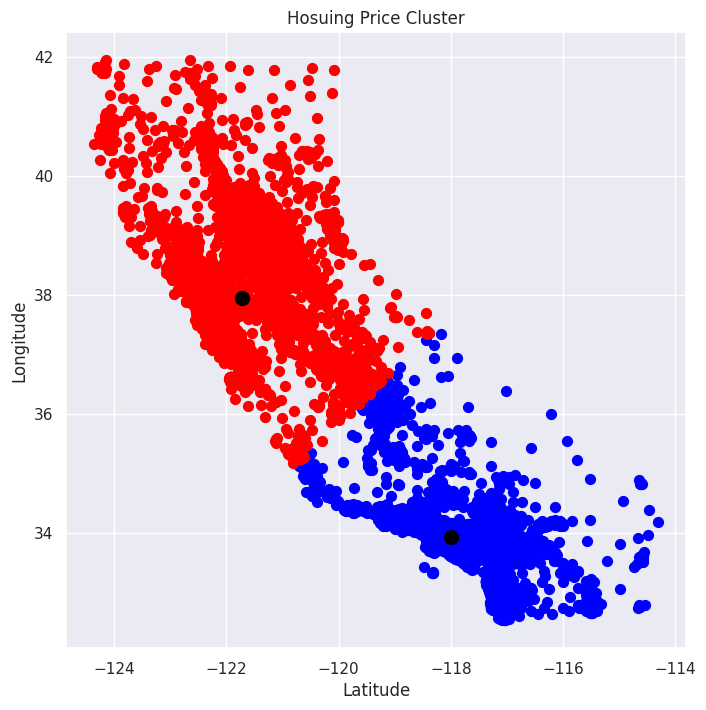

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50, c='blue',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50, c='red',label='Cluster 2')

#ploting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title('Hosuing Price Cluster')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import *
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("/content/housing.csv")

Exploratory data analysis

In [ ]:
def expand_categories (values):
    result = []
    s = values.value_counts() 
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v, round(100*(s[v]/t),2))) 
    return "[{}]".format(",".join(result))

def analyze (df):
    cols = df.columns.values 
    total = float(len(df))
    for col in cols:
        uniques=df[col].unique() 
        unique_count = len(uniques)
        if unique_count>100:
            print("===> {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("===> {}:{}".format(col, expand_categories (df[col]))) 
            expand_categories (df[col])

In [ ]:
analyze(df)

===> longitude:844 (4%)
===> latitude:862 (4%)
===> housing_median_age:[52.0:6.17%,36.0:4.18%,35.0:3.99%,16.0:3.74%,17.0:3.38%,34.0:3.34%,26.0:3.0%,33.0:2.98%,18.0:2.76%,25.0:2.74%,32.0:2.74%,37.0:2.6%,15.0:2.48%,19.0:2.43%,27.0:2.36%,24.0:2.32%,30.0:2.31%,28.0:2.28%,20.0:2.25%,29.0:2.23%,31.0:2.22%,23.0:2.17%,21.0:2.16%,14.0:2.0%,22.0:1.93%,38.0:1.91%,39.0:1.79%,42.0:1.78%,44.0:1.72%,43.0:1.71%,40.0:1.47%,13.0:1.46%,41.0:1.43%,45.0:1.42%,10.0:1.28%,11.0:1.23%,46.0:1.19%,5.0:1.18%,12.0:1.15%,8.0:1.0%,9.0:0.99%,47.0:0.96%,4.0:0.93%,48.0:0.86%,7.0:0.85%,6.0:0.78%,50.0:0.66%,49.0:0.65%,3.0:0.3%,2.0:0.28%,51.0:0.23%,1.0:0.02%]
===> total_rooms:5926 (28%)
===> total_bedrooms:1924 (9%)
===> population:3888 (18%)
===> households:1815 (8%)
===> median_income:12928 (62%)
===> median_house_value:3842 (18%)
===> ocean_proximity:[<1H OCEAN:44.26%,INLAND:31.74%,NEAR OCEAN:12.88%,NEAR BAY:11.09%,ISLAND:0.02%]


In [ ]:
df.isna().sum().sum()

207

Data Prepprocessing

In [ ]:
def zscore_normalization(df, col): 
    mean =df[col].mean() 
    sd=df[col].std()
    df[col] = (df[col] - mean) / sd
    
def one_hot_encoding(df, col):
    dummies_column= pd.get_dummies(df[col]) 
    for x in dummies_column.columns: 
        dummy_name = f"{col}-{x}"
        df [dummy_name] = dummies_column[x] 
    df.drop(col, axis=1, inplace=True)

In [ ]:
for col in df.columns:
    if col == "ocean_proximity":
        pass
    elif col in ["longitude", "latitude", "median_income"]: 
        one_hot_encoding(df, col) 
    else:
        zscore_normalization(df, col)

Streaming output truncated to the last 5000 lines.
<ipython-input-62-2420c666ce80>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df [dummy_name] = dummies_column[x]
<ipython-input-62-2420c666ce80>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df [dummy_name] = dummies_column[x]
<ipython-input-62-2420c666ce80>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

In [ ]:
x_columns_name = df.columns.drop('ocean_proximity')
x = df[x_columns_name].values

In [ ]:
x

array([[ 0.98211887, -0.8047996 , -0.97030147, ...,  0.        ,
         0.        ,  0.        ],
       [-0.60700421,  2.04584054,  1.34824294, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.85613656, -0.53573291, -0.82554076, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.92482882, -0.17499102, -0.1254685 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.84537267, -0.35559115, -0.3058261 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.00428498,  0.06840662,  0.18541105, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
dummies_variable = pd.get_dummies(df['ocean_proximity']) 
outcomes = dummies_variable.columns
y = dummies_variable.values

In [ ]:
y.shape

(20640, 5)

In [ ]:
x.shape

(20640, 14640)

In [ ]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity,longitude--124.35,longitude--124.3,longitude--124.27,...,median_income-13.8556,median_income-13.947,median_income-14.2867,median_income-14.2959,median_income-14.4113,median_income-14.4219,median_income-14.5833,median_income-14.9009,median_income-15.0,median_income-15.0001
0,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.129580,NEAR BAY,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.607004,2.045841,1.348243,0.861418,1.669921,1.314124,NEAR BAY,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.258663,NEAR BAY,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,1.165072,NEAR BAY,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,1.172871,NEAR BAY,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(20640, 14641)

<Axes: >

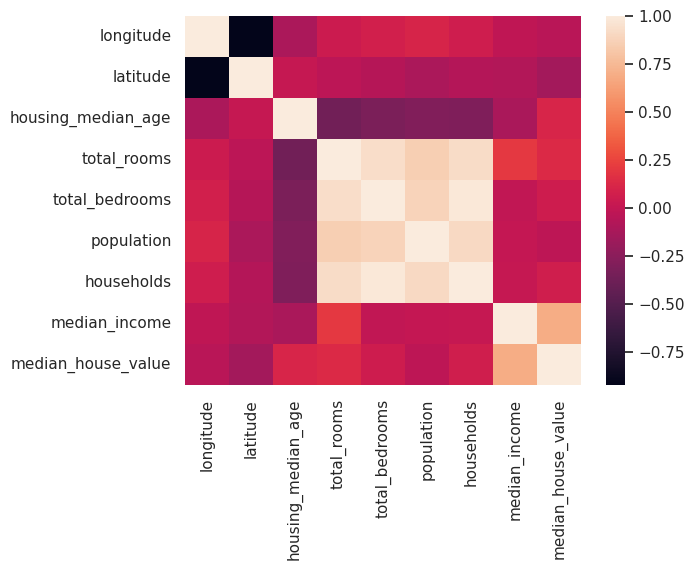

In [ ]:
import seaborn as sns
df = pd.read_csv("/content/housing.csv")
sns.heatmap(df.corr())


Splitting the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
#We are splitting the dataset into train data (75% and test data (25%).

ANN Model

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=x.shape[1], activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense (32, kernel_initializer='normal'))
model.add(Dense (y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
484/484 [==============================] - 7s 12ms/step - loss: 0.5913 - accuracy: 0.7764 - val_loss: nan - val_accuracy: 0.8603
Epoch 2/10
484/484 [==============================] - 8s 16ms/step - loss: 0.1585 - accuracy: 0.9477 - val_loss: nan - val_accuracy: 0.8688
Epoch 3/10
484/484 [==============================] - 8s 17ms/step - loss: 0.0447 - accuracy: 0.9868 - val_loss: nan - val_accuracy: 0.8797
Epoch 4/10
484/484 [==============================] - 6s 13ms/step - loss: 0.0180 - accuracy: 0.9950 - val_loss: nan - val_accuracy: 0.8783
Epoch 5/10
484/484 [==============================] - 6s 11ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: nan - val_accuracy: 0.8806
Epoch 6/10
484/484 [==============================] - 6s 13ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: nan - val_accuracy: 0.8688
Epoch 7/10
484/484 [==============================] - 5s 11ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: nan - val_accuracy: 0.8742
Epoch 8/10
484/484 [

In [ ]:
loss_acc_ann = model.evaluate(x_test, y_test)
print("Accuracy of ANN Model "+ str(loss_acc_ann[1]))
print("Loss of ANN Model "+ str(loss_acc_ann[0]))

162/162 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8816
Accuracy of ANN Model 0.8815891742706299
Loss of ANN Model nan


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                937024    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 944,485
Trainable params: 944,485
Non-trainable params: 0
_________________________________________________________________


RMSE Value

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/housing.csv')

# Drop any rows with missing values
df = df.dropna()

# Separate the target variable and feature variables
y = df['latitude']
X = df.drop('latitude', axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.3906362091614152


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data into a Pandas DataFrame
df = pd.read_csv("/content/housing.csv")

# Split the data into input features (X) and target values (y)
X = df.drop("housing_median_age", axis=1)
y = df["housing_median_age"]

# Define the columns to one-hot encode
ocean_proximity_col = ["ocean_proximity"]

# Encode the categorical variables using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), ocean_proximity_col),
    ]
)

X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree regression model
int_model1 = DecisionTreeRegressor()
int_model1.fit(x_train, y_train)

# Predict the target values for the testing set
y_predict = int_model1.predict(x_test)

# Calculate the mean squared error and R^2 score of the model on the testing set
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Print the mean squared error and R^2 score
print("Mean Squared Error of Decision Tree Model is " + str(mse))
print("R^2 Score of Decision Tree Model is " + str(r2))

Mean Squared Error of Decision Tree Model is 140.64783516451286
R^2 Score of Decision Tree Model is 0.10226681801182225


Decision Tree Model (Before Optimization)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
#We are splitting the dataset into train data (75% and test data (25%)

              precision    recall  f1-score   support

        high       0.94      0.94      0.94       927
         low       0.94      0.95      0.94      2114
      medium       0.95      0.94      0.94      3151

    accuracy                           0.94      6192
   macro avg       0.94      0.94      0.94      6192
weighted avg       0.94      0.94      0.94      6192



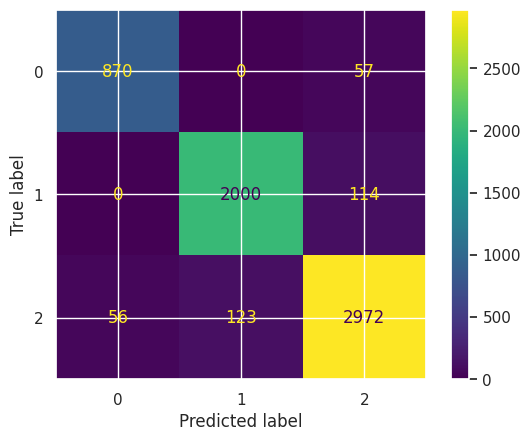

Accuracy of Decision Tree Model is 0.9434754521963824


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

# Load the dataset
data = pd.read_csv('/content/housing.csv')

# Replace missing values with mean
data = data.fillna(data.mean())

# Convert the target variable into categorical values
data['longitude_bin'] = pd.cut(data['longitude'], bins=3, labels=['low', 'medium', 'high'])

# Label encode the non-numeric column
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

# Split the data into training and testing sets
x = data.drop(['longitude', 'longitude_bin'], axis=1)
y = data['longitude_bin']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Train the model
int_model1 = DecisionTreeClassifier()
int_model1.fit(x_train, y_train)

# Test the model
acc = int_model1.score(x_test, y_test)
y_predict = int_model1.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_predict))
confusionMatrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
cm_display.plot()
plt.show()
print("Accuracy of Decision Tree Model is "+str(acc))

Random Forest Model (Before Optimization)

              precision    recall  f1-score   support

        high       0.96      0.94      0.95       927
         low       0.95      0.98      0.97      2114
      medium       0.97      0.95      0.96      3151

    accuracy                           0.96      6192
   macro avg       0.96      0.96      0.96      6192
weighted avg       0.96      0.96      0.96      6192



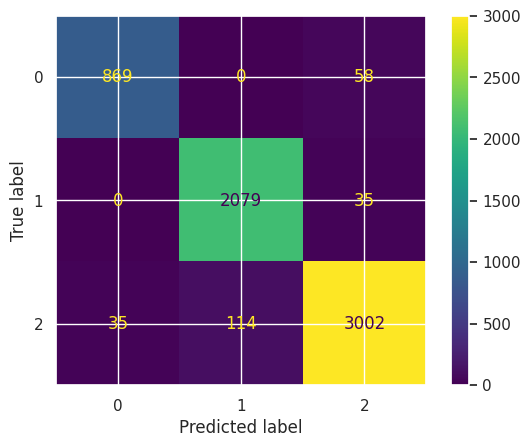

Accuracy of Random Forest Model is 0.9609173126614987


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

# Load the dataset
data = pd.read_csv('/content/housing.csv')

# Replace missing values with mean
data = data.fillna(data.mean())

# Convert the target variable into categorical values
data['longitude_bin'] = pd.cut(data['longitude'], bins=3, labels=['low', 'medium', 'high'])

# Label encode the non-numeric column
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

# Split the data into training and testing sets
x = data.drop(['longitude', 'longitude_bin'], axis=1)
y = data['longitude_bin']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(x_train, y_train)

# Test the model
acc = rf_model.score(x_test, y_test)
y_predict = rf_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_predict))
confusionMatrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
cm_display.plot()
plt.show()
print("Accuracy of Random Forest Model is "+str(acc))

Feature Extraction (Optimization)

In [ ]:
feature_ext = DecisionTreeClassifier()
feature_ext.fit(x,y) #Training a decision tree model on the whole dataset without splitting
imp = feature_ext.feature_importances_

In [ ]:
imp

array([0.76971599, 0.01890464, 0.01437342, 0.01239653, 0.01303967,
       0.01161487, 0.01685788, 0.05663858, 0.08645842])

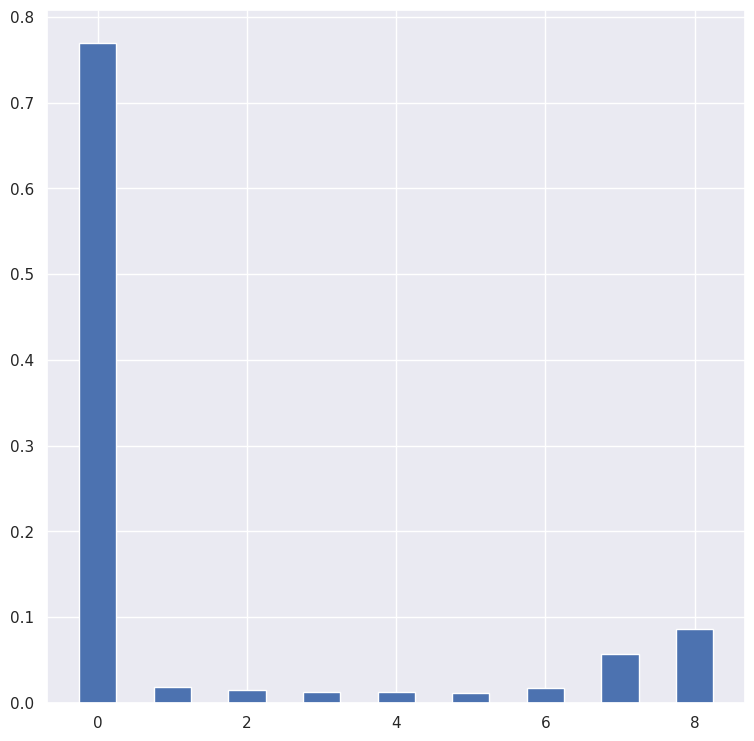

In [ ]:
plt.figure(figsize=(9,9))
plt.bar([x for x in range(len(imp))], imp, width=0.5)
plt.show() #Showing the importance of each feature in bar chart

In [ ]:
unwanted_cols = []
for i,j in enumerate(imp):
    if(j<0.001): #We are checking for the features which has importance value less than 0.001.
        unwanted_cols.append(i) #If its less than 0.001 we will append coluumn number in a list which will be later used to drop those columns in the list.
unwanted_feat = len(unwanted_cols)
print("There are "+str(unwanted_feat)+" unwanted features.")

There are 0 unwanted features.


In [ ]:
print(unwanted_cols)

[]


In [ ]:
x.shape

(20640, 9)

Randomized Search CV (Optimization)

In [ ]:
model_params = {
    'Decision Tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100, 200, 300, 400, 500],
            'criterion': ['gini', 'entropy', 'log_loss'],
        }
    }

}

Training models using Randomized Search CV (After Optimization)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
scores1 = [] #List to store model name, best training score, parameters that gave the best accuracy and accuracy of the model.

for model_name, mp in model_params.items(): #We are inputting the JSON object to RandomizedSearchCV() which trains each of the model in JSON using for loop with different combination of parameters.
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False) #We have user K-fold cross validation value as 3 because we have 370515 samples. In this line, the RandomizedSearchCV selects the model and parameters to train and store in clf model.
    clf.fit(x_train, y_train) #The selected model along with parameters are trained
    scores1.append({ #Appending model name, best training score, parameters that gave the best accuracy and accuracy of the model in a list.
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'accuracy' : clf.score(x_test, y_test)
    })
    
acc1 = pd.DataFrame(scores1,columns=['model','best_score','best_params', 'accuracy']) #Converting the list into dataframe for easy interpretation.
acc1

,model,best_score,best_params,accuracy
0,Decision Tree,0.949289,"{'splitter': 'best', 'criterion': 'entropy'}",0.948837
1,Random Forest,0.963372,"{'n_estimators': 500, 'criterion': 'log_loss'}",0.969961
